In [1]:
from acquire import acquire_data
from wrangle import wrangle_data

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import linregress

from math import sqrt

# Aqcuisition

In [2]:
df = acquire_data()

csv has been previously generated.
Data Acquired


In [3]:
df.head()

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,FIPS,Name,State
0,0,3.0,2.0,1458.0,136104.0,2319.90,6037.0,6037,Los Angeles,CA
1,1,2.0,1.0,1421.0,35606.0,543.69,6037.0,6037,Los Angeles,CA
2,2,3.0,2.0,1650.0,614000.0,7673.19,6037.0,6037,Los Angeles,CA
3,3,2.0,1.0,693.0,274237.0,3267.47,6037.0,6037,Los Angeles,CA
4,4,0.0,0.0,1378.0,168828.0,2135.39,6037.0,6037,Los Angeles,CA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Data columns (total 10 columns):
Unnamed: 0                      15036 non-null int64
bedroomcnt                      15036 non-null float64
bathroomcnt                     15036 non-null float64
calculatedfinishedsquarefeet    15012 non-null float64
taxvaluedollarcnt               15036 non-null float64
taxamount                       15035 non-null float64
fips                            15036 non-null float64
FIPS                            15036 non-null int64
Name                            15036 non-null object
State                           15036 non-null object
dtypes: float64(6), int64(2), object(2)
memory usage: 1.1+ MB


In [5]:
print(f'Total number of rows: {len(df)}')

Total number of rows: 15036


# Preparation

In [6]:
seed = 115
train_size = .8

train, test = wrangle_data(df, seed, train_size)

Data Prepared and Split


In [7]:
train.head()

,bedroom_count,bathroom_count,total_sqft,property_value,tax_amount,county,state
13032,2.0,2.0,1194.0,371363.0,4111.36,Orange,CA
1502,3.0,2.0,1794.0,705598.0,8693.67,Los Angeles,CA
4736,3.0,2.0,1215.0,185287.0,2437.92,Los Angeles,CA
11558,3.0,2.5,1709.0,653422.0,7024.88,Orange,CA
6444,4.0,6.0,5862.0,1279726.0,15645.06,Los Angeles,CA


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 13032 to 6949
Data columns (total 7 columns):
bedroom_count     11991 non-null float64
bathroom_count    11991 non-null float64
total_sqft        11991 non-null float64
property_value    11991 non-null float64
tax_amount        11991 non-null float64
county            11991 non-null object
state             11991 non-null object
dtypes: float64(5), object(2)
memory usage: 749.4+ KB


# Exploration

## Exploration Goals

* Calculate the county tax rates
* Create graphs that highlights the effect these three features have on the price of a home
* Get an idea of underlying patterns in the data

## County Tax Rates

## Create a Tax Rate Column

In [9]:
df['tax_rate'] = df.tax_amount / df.property_value

In [10]:
df.head(1)

,bedroom_count,bathroom_count,total_sqft,property_value,tax_amount,county,state,tax_rate
0,3.0,2.0,1458.0,136104.0,2319.9,Los Angeles,CA,0.017045


In [11]:
df.groupby(by='county')['tax_rate'].mean().round(3)

county
Los Angeles    0.014
Orange         0.012
Ventura        0.012
Name: tax_rate, dtype: float64

## Graph out the Distribution of 

## Graphs

Text(0.5, 0.98, 'What Affects Taxes Most')

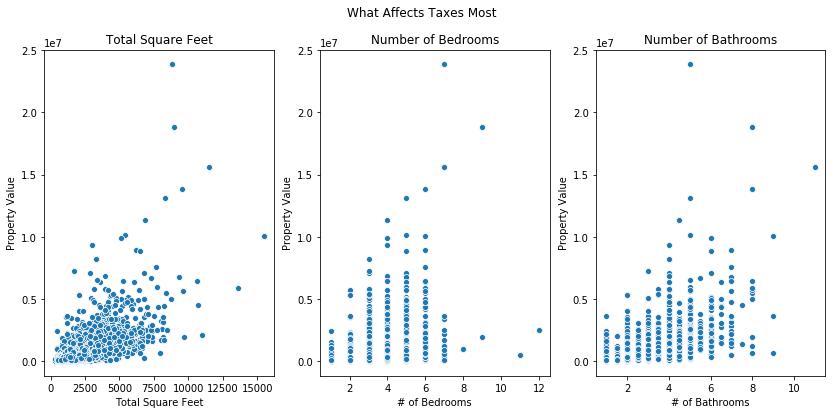

In [12]:
# Figure: Scatterplot of Features

y = train.property_value

plt.figure(figsize=(14,6))

# Left graph
plt.subplot(131)
sns.scatterplot(train.total_sqft, y)
plt.title('Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Property Value')

# Center graph
plt.subplot(132)
sns.scatterplot(train.bedroom_count, y)
plt.title('Number of Bedrooms')
plt.xlabel('# of Bedrooms')
plt.ylabel('Property Value')

# Right graph
plt.subplot(133)
sns.scatterplot(train.bathroom_count, y)
plt.title('Number of Bathrooms')
plt.xlabel('# of Bathrooms')
plt.ylabel('Property Value')

plt.suptitle('What Affects Taxes Most')

<Figure size 1152x1152 with 0 Axes>

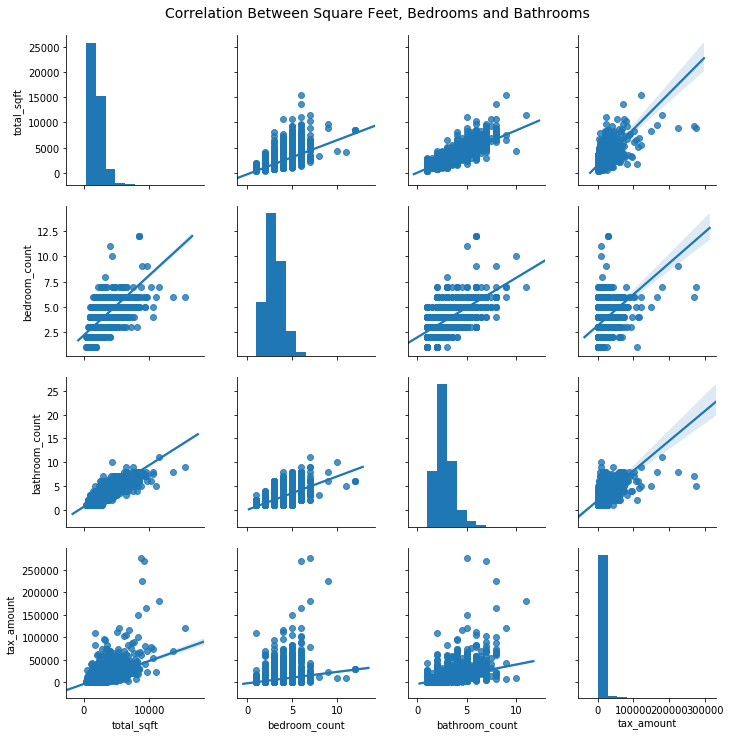

<Figure size 1152x1152 with 0 Axes>

In [13]:
# Figure: Pairplot of Features

sns.pairplot(df[['total_sqft', 'bedroom_count', 'bathroom_count', 'tax_amount']], kind='reg')
plt.suptitle('Correlation Between Square Feet, Bedrooms and Bathrooms', size=14, y=1.02)
plt.figure(figsize=(16, 16))

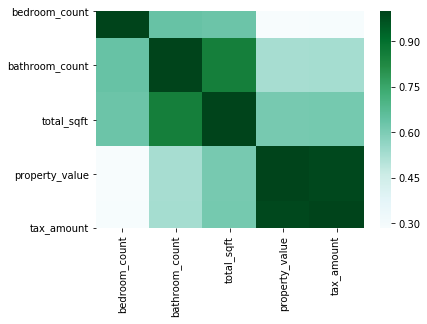

In [14]:
corr = train.corr()
sns.heatmap(corr, cmap="BuGn")

# Modeling

## Create a Dataframe to Hold Actual and Predicted Values

In [15]:
predictions = pd.DataFrame(
    {'actual': train.tax_amount})

## Create Basic Models (Measures a Single Feature)

In [16]:
# Model Using the Total Square Feet to Predict Tax Amount

x1 = train[['total_sqft']]
y = train.tax_amount

lm_sqft = LinearRegression().fit(x1, y)

In [17]:
# Model Using the Number of Bedrooms to Predict Tax Amount

x2 = train[['bedroom_count']]
y = train.tax_amount

lm_bedroom = LinearRegression().fit(x2, y)

In [18]:
# Model Using the Number of Bathrooms to Predict Tax Amount

x3 = train[['bathroom_count']]
y = train.tax_amount

lm_bathroom = LinearRegression().fit(x3, y)

## Use the  Models to Create Predictions

In [20]:
predictions['baseline'] = y.mean()
predictions['lm_sqft'] = lm_sqft.predict(x1)
predictions['lm_bedroom'] = lm_bedroom.predict(x2)
predictions['lm_bathroom'] = lm_bathroom.predict(x3)
predictions['lm_sqft_bed_bath'] = lm_sqft_bed_bath.predict(x4)

In [21]:
predictions.head()

,actual,baseline,lm_sqft,lm_bedroom,lm_bathroom,lm_sqft_bed_bath
13032,4111.36,6626.529484,2748.978695,3212.867579,5144.063272,4411.987633
1502,8693.67,6626.529484,5798.404711,5783.081060,5144.063272,6032.039413
4736,2437.92,6626.529484,2855.708605,5783.081060,5144.063272,2899.208274
11558,7024.88,6626.529484,5366.402692,5783.081060,7321.458219,5934.298357
6444,15645.06,6626.529484,26473.513102,8353.294541,22563.222841,29314.003095


# Evaluation

## Use RMSE to Compare Models

In [47]:
rmse_results = {
'baseline_model' : sqrt(mse(predictions.actual, predictions.baseline)),   
'sqft_model' : sqrt(mse(predictions.actual, predictions.lm_sqft)),
'bedroom_model' : sqrt(mse(predictions.actual, predictions.lm_bedroom)),
'bathroom_model' : sqrt(mse(predictions.actual, predictions.lm_bathroom)),
'sqft_bedroom_bathroom_model' : sqrt(mse(predictions.actual, predictions.lm_sqft_bed_bath))
}

## Evaluating the Best Model to Test for Overfitting

## Result

In [54]:
for key in rmse_results:
    print(f'{key}: {rmse_results[key]}')

baseline_model: 8388.437278484398
sqft_model: 6616.782802909106
bedroom_model: 8032.762747110267
bathroom_model: 7107.028983907678
sqft_bedroom_bathroom_model: 6515.927017532109


__Model using a combination of all three features performed the best__. 
Additionally, model beats baseline indicating model is significant.